In [16]:
import requests
from pathlib import Path
import json
import os
import pandas as pd
import seaborn as sns
from scipy import stats

url = 'http://api.medulina.com/api/v1/'

In [35]:
res = []
for p in [1,2,3]:
    getm_url = url+'mask?where={"mode":"try","user_id":"5991ba5df441bd00082835bc"}&max_results=200&page=%d'%p
    res_m= requests.get(getm_url)
    res.extend(res_m.json()['_items'])

In [48]:
resdf = pd.DataFrame(res)
resdf = resdf.sort_values('_updated')

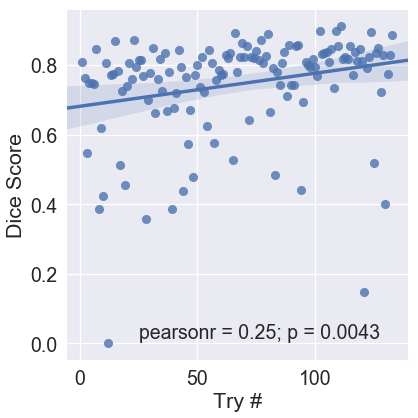

In [67]:

sns.set_context('talk', font_scale = 1.5)
x = resdf.index.values[1:]
y = resdf.score.values[1:]
g = sns.JointGrid(x, y, ratio=100)
g.plot_joint(sns.regplot)
g.annotate(stats.pearsonr)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.set_axis_labels(xlabel='Try #',ylabel='Dice Score')